In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style('default')

Read the dataset

In [3]:
df = pd.read_csv("train.csv")
df

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


check if some data points are missing

In [4]:
df.isna().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

heatmap

<AxesSubplot:>

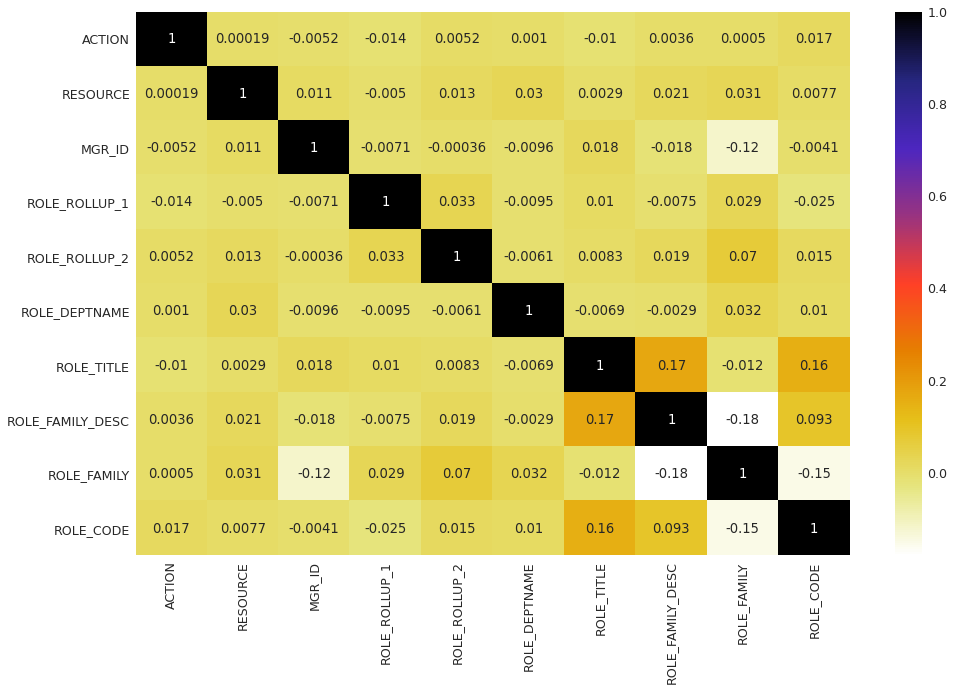

In [5]:
plt.figure(figsize=(16,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [6]:
# df1 = df.drop(['ROLE_FAMILY'], axis = 1)
df1 = df.copy()

In [7]:
x1 = df1.drop('ACTION', axis = 1)
y1 = df1.ACTION

In [8]:
x1_train, x1_test, y1_train, y1_test = train_test_split(
...     x1, y1, test_size=0.2, random_state=0)

In [9]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
model = DecisionTreeClassifier()
# model = RandomForestClassifier(n_estimators=80, bootstrap=False, random_state = 9, warm_start=True)
# model = KNeighborsClassifier(n_neighbors=2)
# model = LogisticRegression(class_weight = 'balanced')
model.fit(x1_train, y1_train)
# print(model.score(x1_test, y1_test))
y1_p = model.predict(x1_test)
fpr, tpr, thresholds = metrics.roc_curve(y1_test, y1_p, pos_label=1)
auc = metrics.auc(fpr,tpr)
auc

0.6742372061795778

In [44]:
print((fpr, tpr, thresholds))

(array([0.        , 0.60752688, 1.        ]), array([0.        , 0.95600129, 1.        ]), array([2, 1, 0]))


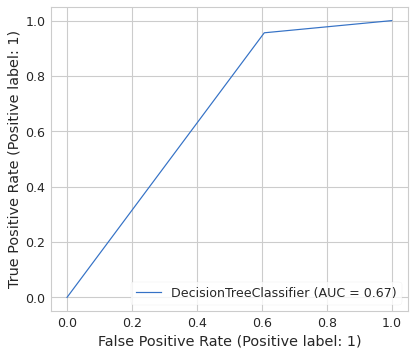

In [42]:
metrics.plot_roc_curve(model, x1_test, y1_test)

In [12]:
from tensorflow import keras

In [13]:
# model = keras.Sequential()
# model.add(keras.layers.Dense(9, input_shape = (9,), activation='sigmoid'))
# model.add(keras.layers.Dense(9, activation='sigmoid'))
# model.add(keras.layers.Dense(1, activation='softmax'))

# model.compile(
#               optimizer='adam',
#               loss = 'binary_crossentropy',
#               metrics=['accuracy']
# )

# model.fit(x1_train, y1_train, epochs=5)

In [14]:
# model.fit(x1_train, y1_train, epochs=5)

In [15]:
# y1_p = np.transpose(model.predict(x1_test))[0]
# fpr, tpr, thresholds = metrics.roc_curve(y1_test, y1_p, pos_label=1)
# auc = metrics.auc(fpr,tpr)
# auc

In [28]:
df_t = pd.read_csv("test.csv")
df_t1 = df_t.drop(["id"], axis = 1)

In [36]:
model.fit(x1, y1)
predictions = model.predict(df_t1)
predictions = np.transpose(predictions)

array([0, 0, 1, ..., 1, 1, 1])

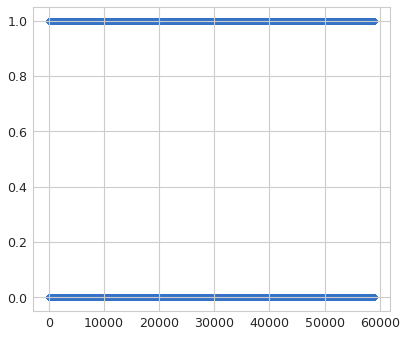

In [34]:
l = []
for i in range(len(predictions)):
    l.append(i)
    
plt.scatter(l, predictions)

In [ ]:
output = pd.DataFrame({'id': df_t.id, 'ACTION': predictions})
output.to_csv('my_submission_1.csv', index=False)
predictions